# Vectorizing Text With TFIDF

In [0]:
import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, average_precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import eli5
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
%matplotlib inline

In [0]:
#raw = pd.read_csv('train_preprocessed (1).csv')
#raw.dropna(inplace=True)

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
raw.shape

(1305779, 4)

In [0]:
subset_amount = .1
raw = pd.read_csv(r'train_preprocessed (1).csv', skiprows=lambda i: i>0 and random.random() > subset_amount, 
                  usecols=['clean_question_text','target','qid'])
raw.dropna(inplace=True)

In [0]:
%time
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=10, max_df=1.0,max_features=12000, ngram_range=(1,2))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [0]:
%time
X, y = raw.clean_question_text, raw.target

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [0]:
%time
tfidf_vectorizer.fit(X)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.float64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=12000, min_df=10,
        ngram_range=(1, 2), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [0]:
%time
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0) 

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [0]:
%time
X_train = tfidf_vectorizer.transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


In [0]:
%time
LR_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=42,max_iter=4000,verbose=1)

CPU times: user 17 µs, sys: 1e+03 ns, total: 18 µs
Wall time: 7.87 µs


In [0]:
%time
LR_classifier.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=1, warm_start=False)

In [0]:
%time

y_preds_test=LR_classifier.predict(X_test)
y_probas_test=LR_classifier.predict_proba(X_test)

y_preds_train=LR_classifier.predict(X_train)
y_probas_train=LR_classifier.predict_proba(X_train)

y_true_train = y_train.values
y_true_test = y_test.values

print("Train Accuracy Score: ", accuracy_score(y_true_train, y_preds_train))
print("Test Accuracy Score: ", accuracy_score(y_true_test, y_preds_test))
print("Train F1 Score: ", f1_score(y_true_train, y_preds_train))
print("Test F1 Score: ", f1_score(y_true_test, y_preds_test))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs
('Train Accuracy Score: ', 0.9534708153358052)
('Test Accuracy Score: ', 0.9465616757769199)
('Train F1 Score: ', 0.4910630291627469)
('Test F1 Score: ', 0.4106239460370995)


## Naive Bayes (Multinomial)

In [0]:
%time

MNB_classifier = MultinomialNB()
MNB_classifier.fit(X_train, y_train)

y_preds_test=MNB_classifier.predict(X_test)
y_probas_test=MNB_classifier.predict_proba(X_test)

y_preds_train=MNB_classifier.predict(X_train)
y_probas_train=MNB_classifier.predict_proba(X_train)

y_true_train = y_train.values
y_true_test = y_test.values

print("Train Accuracy Score: ", accuracy_score(y_true_train, y_preds_train))
print("Test Accuracy Score: ", accuracy_score(y_true_test, y_preds_test))
print("Train F1 Score: ", f1_score(y_true_train, y_preds_train))
print("Test F1 Score: ", f1_score(y_true_test, y_preds_test))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.15 µs
('Train Accuracy Score: ', 0.9470681548870457)
('Test Accuracy Score: ', 0.9418217958029127)
('Train F1 Score: ', 0.3372023453392366)
('Test F1 Score: ', 0.266152362584378)


In [0]:
%time

BNB_classifier = BernoulliNB()
BNB_classifier.fit(X_train, y_train)

y_preds_test=BNB_classifier.predict(X_test)
y_probas_test=BNB_classifier.predict_proba(X_test)

y_preds_train=BNB_classifier.predict(X_train)
y_probas_train=BNB_classifier.predict_proba(X_train)

y_true_train = y_train.values
y_true_test = y_test.values

print("Train Accuracy Score: ", accuracy_score(y_true_train, y_preds_train))
print("Test Accuracy Score: ", accuracy_score(y_true_test, y_preds_test))
print("Train F1 Score: ", f1_score(y_true_train, y_preds_train))
print("Test F1 Score: ", f1_score(y_true_test, y_preds_test))

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 14.1 µs
('Train Accuracy Score: ', 0.9344539581820267)
('Test Accuracy Score: ', 0.9306983677993961)
('Train F1 Score: ', 0.5487203105467465)
('Test F1 Score: ', 0.521003963011889)


# Extra Trees

In [0]:
%time
ET_classifier = ExtraTreesClassifier(n_estimators=200,random_state=420,verbose=2,max_features=.05)
ET_classifier.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.15 µs


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 19.7min finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=0.05, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=420, verbose=2, warm_start=False)

In [0]:
y_preds_test=ET_classifier.predict(X_test)
y_probas_test=ET_classifier.predict_proba(X_test)

y_preds_train=ET_classifier.predict(X_train)
y_probas_train=ET_classifier.predict_proba(X_train)

y_true_train = y_train.values
y_true_test = y_test.values

print("Train Accuracy Score: ", accuracy_score(y_true_train, y_preds_train))
print("Test Accuracy Score: ", accuracy_score(y_true_test, y_preds_test))
print("Train F1 Score: ", f1_score(y_true_train, y_preds_train))
print("Test F1 Score: ", f1_score(y_true_test, y_preds_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


('Train Accuracy Score: ', 0.9992163908107489)
('Test Accuracy Score: ', 0.9431214403119147)
('Train F1 Score: ', 0.9936355169202111)
('Test F1 Score: ', 0.37478991596638656)


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.2min finished


# Ensemble Voting Classifier

In the last notebook, I mentioned that it could be beneifical to combine the predictions of multiple models. Let's create a Voting Classifer based on Logistic Regression, Extra Trees and Bernouli Naive Bayes (since it seems to be outperforming Multinominal Naive Bayes)

In [0]:
eclf1 = VotingClassifier(estimators=[('lr', LR_classifier), ('et', ET_classifier), ('nb', BNB_classifier)], voting='soft')

In [0]:
eclf1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 20.4min finished


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=1, warm_start=False)), ('et', E... warm_start=False)), ('nb', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [0]:
y_preds_test=eclf1.predict(X_test)
y_probas_test=eclf1.predict_proba(X_test)

y_preds_train=eclf1.predict(X_train)
y_probas_train=eclf1.predict_proba(X_train)

y_true_train = y_train.values
y_true_test = y_test.values

print("Train Accuracy Score: ", accuracy_score(y_true_train, y_preds_train))
print("Test Accuracy Score: ", accuracy_score(y_true_test, y_preds_test))
print("Train F1 Score: ", f1_score(y_true_train, y_preds_train))
print("Test F1 Score: ", f1_score(y_true_test, y_preds_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


('Train Accuracy Score: ', 0.9801421963992202)
('Test Accuracy Score: ', 0.9488933909254234)
('Train F1 Score: ', 0.8241367637102234)
('Test F1 Score: ', 0.5115089514066496)


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.2min finished


Because of the presence of the Extra Trees Model, the voting classifier was obviously going to be overfit. But it looks like the Naive Bayes and Logistic Regression models might have scaled back the overfitting a bit!

# Plotting

In order to get a sense of how the ensemble classifier relates to the individual models that compose it, let's plot out the True Positives/False Postives and Classification Scores for the 3 models and the ensemble classifier, according to various thresholds.

In [0]:
y_probas_test_ec = y_probas_test

In [0]:
y_probas_test_LR=LR_classifier.predict_proba(X_test)
y_probas_test_ET=ET_classifier.predict_proba(X_test)
y_probas_test_NB=BNB_classifier.predict_proba(X_test)
y_probas_test_EC=eclf1.predict_proba(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.3s finished


In [0]:
pred_proba_df_ec = pd.DataFrame(y_probas_test_EC)
pred_proba_df_lr = pd.DataFrame(y_probas_test_LR)
pred_proba_df_nb = pd.DataFrame(y_probas_test_NB)
pred_proba_df_et = pd.DataFrame(y_probas_test_ET)

# Ensemble Classifier Frame

In [0]:
pred_proba_df_ec = pd.DataFrame(y_probas_test_ec)

In [0]:
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,
                  0.4,0.45,0.5,0.55,0.6,0.65,
                  .7,.75,.8,.85,.9,.95,.99]

In [0]:
true_poses = []
false_poses = []
accuracy_scores = []
prec_scores = []
recall_scores = []

In [0]:
for i in threshold_list:
    y_test_pred = pred_proba_df_ec.applymap(lambda x: 1 if x>i else 0)
    
    new_y_true = y_test.as_matrix().reshape(y_test.as_matrix().size,1);
    new_y_preds = y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1);

    true_pos = pd.DataFrame(confusion_matrix(new_y_true,new_y_preds))[1][1]
    true_poses.append(true_pos)
    
    false_pos = pd.DataFrame(confusion_matrix(new_y_true,new_y_preds))[0][1]
    false_poses.append(false_pos)
    
    acc_score = accuracy_score(new_y_true,new_y_preds)
    accuracy_scores.append(acc_score)
    
    precscore = precision_score(new_y_true,new_y_preds)
    prec_scores.append(precscore)
    
    recscore = recall_score(new_y_true,new_y_preds)
    recall_scores.append(recscore)

In [0]:
prob_results_ec = pd.DataFrame(threshold_list)

In [0]:
prob_results_ec['True_Positives'] = true_poses
prob_results_ec['False_Positives'] = false_poses
prob_results_ec['Accuracy_Scores'] = accuracy_scores
prob_results_ec['Recall_Scores'] = recall_scores
prob_results_ec['Precision_Scores'] = prec_scores
prob_results_ec['F1'] =  2 * ((prob_results_ec['Precision_Scores'] * prob_results_ec['Recall_Scores'])
/   (prob_results_ec['Precision_Scores'] + prob_results_ec['Recall_Scores']))

In [0]:
prob_results_ec.columns = ['thresholds','True_Positives', 'False_Positives', 'Accuracy_Scores','Recall_Scores','Precision_Scores','F1']

# LR Frame

In [0]:
true_poses = []
false_poses = []
accuracy_scores = []
prec_scores = []
recall_scores = []

In [0]:
for i in threshold_list:
    y_test_pred = pred_proba_df_lr.applymap(lambda x: 1 if x>i else 0)
    
    new_y_true = y_test.as_matrix().reshape(y_test.as_matrix().size,1);
    new_y_preds = y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1);

    true_pos = pd.DataFrame(confusion_matrix(new_y_true,new_y_preds))[1][1]
    true_poses.append(true_pos)
    
    false_pos = pd.DataFrame(confusion_matrix(new_y_true,new_y_preds))[0][1]
    false_poses.append(false_pos)
    
    acc_score = accuracy_score(new_y_true,new_y_preds)
    accuracy_scores.append(acc_score)
    
    precscore = precision_score(new_y_true,new_y_preds)
    prec_scores.append(precscore)
    
    recscore = recall_score(new_y_true,new_y_preds)
    recall_scores.append(recscore)
    
    

In [0]:
prob_results_lr = pd.DataFrame(threshold_list)

In [0]:
prob_results_lr['True_Positives'] = true_poses
prob_results_lr['False_Positives'] = false_poses
prob_results_lr['Accuracy_Scores'] = accuracy_scores
prob_results_lr['Recall_Scores'] = recall_scores
prob_results_lr['Precision_Scores'] = prec_scores
prob_results_lr['F1'] =  2 * ((prob_results_lr['Precision_Scores'] * prob_results_lr['Recall_Scores'])
/   (prob_results_lr['Precision_Scores'] + prob_results_lr['Recall_Scores']))

In [0]:
prob_results_lr.columns = ['thresholds','True_Positives', 'False_Positives', 'Accuracy_Scores','Recall_Scores','Precision_Scores','F1']

# NB Frame

In [0]:
true_poses = []
false_poses = []
accuracy_scores = []
prec_scores = []
recall_scores = []

In [0]:
for i in threshold_list:
    y_test_pred = pred_proba_df_nb.applymap(lambda x: 1 if x>i else 0)
    
    new_y_true = y_test.as_matrix().reshape(y_test.as_matrix().size,1);
    new_y_preds = y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1);

    true_pos = pd.DataFrame(confusion_matrix(new_y_true,new_y_preds))[1][1]
    true_poses.append(true_pos)
    
    false_pos = pd.DataFrame(confusion_matrix(new_y_true,new_y_preds))[0][1]
    false_poses.append(false_pos)
    
    acc_score = accuracy_score(new_y_true,new_y_preds)
    accuracy_scores.append(acc_score)
    
    precscore = precision_score(new_y_true,new_y_preds)
    prec_scores.append(precscore)
    
    recscore = recall_score(new_y_true,new_y_preds)
    recall_scores.append(recscore)

In [0]:
prob_results_nb = pd.DataFrame(threshold_list)

In [0]:
prob_results_nb['True_Positives'] = true_poses
prob_results_nb['False_Positives'] = false_poses
prob_results_nb['Accuracy_Scores'] = accuracy_scores
prob_results_nb['Recall_Scores'] = recall_scores
prob_results_nb['Precision_Scores'] = prec_scores
prob_results_nb['F1'] =  2 * ((prob_results_lr['Precision_Scores'] * prob_results_nb['Recall_Scores'])
/   (prob_results_nb['Precision_Scores'] + prob_results_nb['Recall_Scores']))

In [0]:
prob_results_nb.columns = ['thresholds','True_Positives', 'False_Positives', 'Accuracy_Scores','Recall_Scores','Precision_Scores','F1']

# ExtraTrees Frame

In [0]:
true_poses = []
false_poses = []
accuracy_scores = []
prec_scores = []
recall_scores = []

In [0]:
for i in threshold_list:
    y_test_pred = pred_proba_df_et.applymap(lambda x: 1 if x>i else 0)
    
    new_y_true = y_test.as_matrix().reshape(y_test.as_matrix().size,1);
    new_y_preds = y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1);

    true_pos = pd.DataFrame(confusion_matrix(new_y_true,new_y_preds))[1][1]
    true_poses.append(true_pos)
    
    false_pos = pd.DataFrame(confusion_matrix(new_y_true,new_y_preds))[0][1]
    false_poses.append(false_pos)
    
    acc_score = accuracy_score(new_y_true,new_y_preds)
    accuracy_scores.append(acc_score)
    
    precscore = precision_score(new_y_true,new_y_preds)
    prec_scores.append(precscore)
    
    recscore = recall_score(new_y_true,new_y_preds)
    recall_scores.append(recscore)

In [0]:
prob_results_et = pd.DataFrame(threshold_list)

In [0]:
prob_results_et['True_Positives'] = true_poses
prob_results_et['False_Positives'] = false_poses
prob_results_et['Accuracy_Scores'] = accuracy_scores
prob_results_et['Recall_Scores'] = recall_scores
prob_results_et['Precision_Scores'] = prec_scores
prob_results_et['F1'] =  2 * ((prob_results_et['Precision_Scores'] * prob_results_et['Recall_Scores'])
/   (prob_results_et['Precision_Scores'] + prob_results_et['Recall_Scores']))

In [0]:
def pos_plotter(data,title):
  plt.plot('thresholds', 'True_Positives', data=data)
  plt.plot('thresholds', 'False_Positives', data=data)
  plt.xlabel('Confidence Threshold')
  plt.title('True and False Positives ({})'.format(title))
  plt.ylabel('Totals')
  
  plt.legend()

In [0]:
prob_results_et.columns = ['thresholds','True_Positives', 'False_Positives', 'Accuracy_Scores','Recall_Scores','Precision_Scores','F1']

# Plot The Model Results

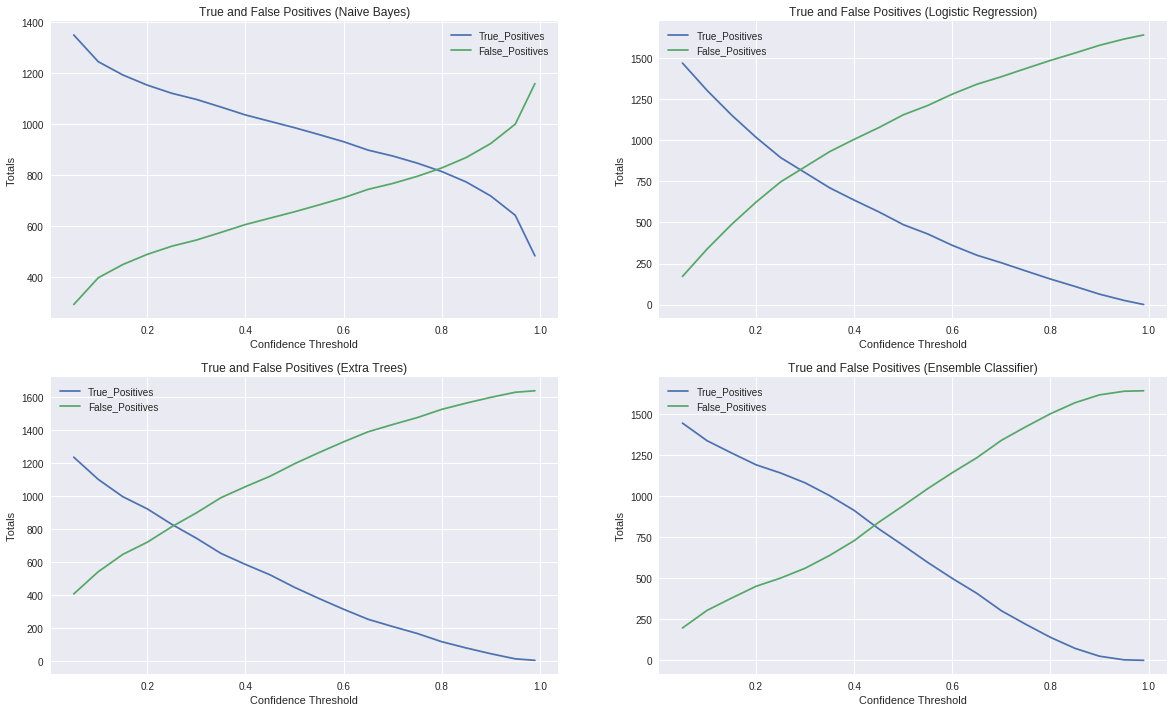

In [0]:
fig = plt.figure(figsize=(20,12))

plt.subplot(2, 2, 1)
pos_plotter(prob_results_nb,'Naive Bayes')
plt.subplot(2, 2, 2)
pos_plotter(prob_results_lr,'Logistic Regression')
plt.subplot(2, 2, 3)
pos_plotter(prob_results_et,'Extra Trees')
plt.subplot(2, 2, 4)
pos_plotter(prob_results_ec,'Ensemble Classifier')
plt.show()

In [0]:
def score_plotter(data, title):

  plt.plot('thresholds', 'Accuracy_Scores', data=data)
  plt.plot('thresholds', 'Recall_Scores', data=data)
  plt.plot('thresholds', 'Precision_Scores', data=data)
  plt.plot('thresholds', 'F1', data=data)
  plt.xlabel('Confidence Threshold')
  plt.ylabel('Score')
  plt.title('Classification Scores at Different Thresholds ({})'.format(title))
  plt.legend()

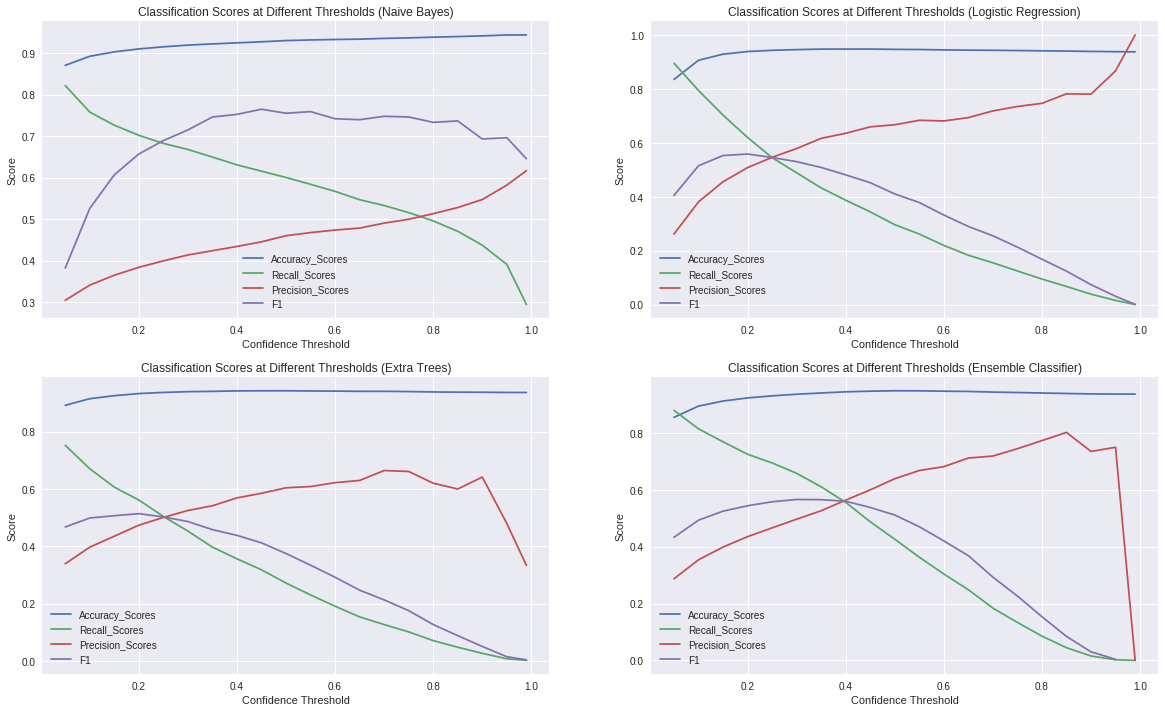

In [0]:
fig = plt.figure(figsize=(20,12))

plt.subplot(2, 2, 1)
score_plotter(prob_results_nb,'Naive Bayes')
plt.subplot(2, 2, 2)
score_plotter(prob_results_lr,'Logistic Regression')
plt.subplot(2, 2, 3)
score_plotter(prob_results_et, 'Extra Trees')
plt.subplot(2, 2, 4)
score_plotter(prob_results_ec, 'Ensemble Classifier')
plt.show()

It is interesting that the voting classifer does really look like a composite of the other three. These plots were generated on only a small amount of our data, but it looks like the naive bayes it doing surprisingly well.

Now let's move on to "word embeddings", which seek to model more than just the latent semantic meaning that CountVectorizer and TFIDF do.